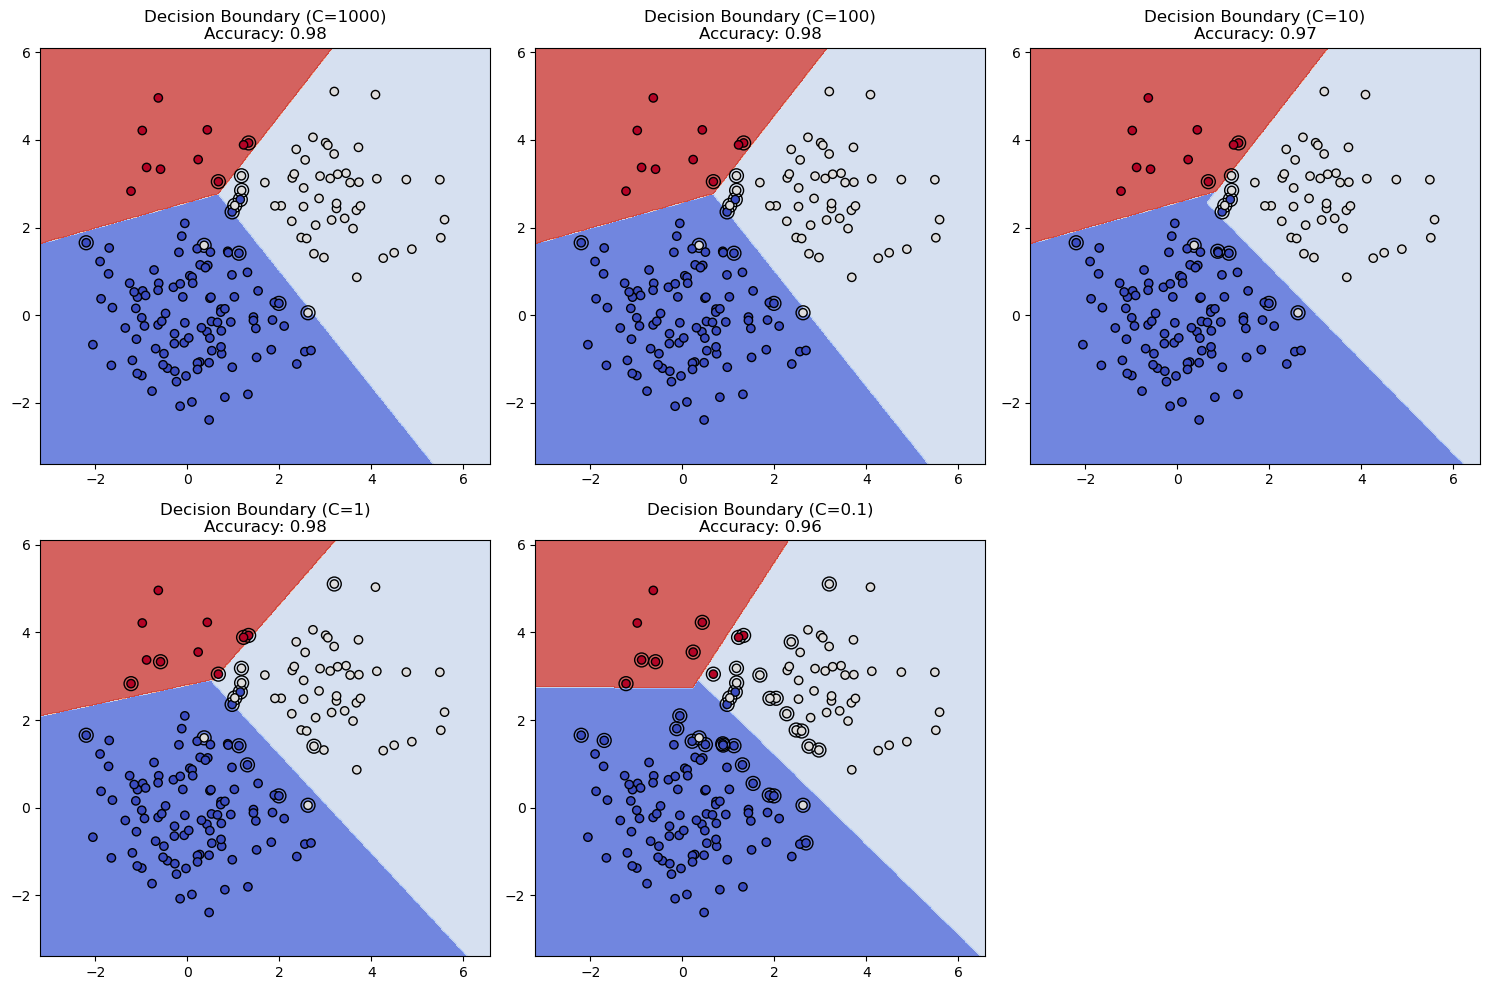

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'data.csv'
df = pd.read_csv(file_path)
X = df[['X', 'Y']].values
y = df['Label'].values

# Define C values
C_values = [1000, 100, 10, 1, 0.1]

# Plot decision boundaries for different C values
plt.figure(figsize=(15, 10))
for i, C in enumerate(C_values, 1):
    plt.subplot(2, 3, i)
    
    # Fit SVM model
    model = svm.SVC(kernel='linear', C=C)
    model.fit(X, y)
    
    # Plot decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    # Calculate and display accuracy
    y_pred = model.predict(X)
    acc = accuracy_score(y, y_pred)
    plt.title(f'Decision Boundary (C={C})\nAccuracy: {acc:.2f}')

plt.tight_layout()
plt.show()
